- ### Planteamiento del problema:

Clasificar casas basados en la ubicación/región e ingreso medio.

In [14]:
# Se importa el dataset
import pandas as pd

url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
dataframe = pd.read_csv(url)

- ### Exploración y limpieza de datos:

In [15]:
# Primera apreciacion del dataset
filas = dataframe.shape[0]
columnas = dataframe.shape[1]
print(f'Filas: {filas} | Columnas: {columnas}')
print()
print(dataframe.info())

Filas: 768 | Columnas: 9

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [16]:
nulos = dataframe.isnull().sum()
if len(nulos[nulos != 0]) == 0:

    print('No hay datos nulos')

else:

    print(nulos[nulos != 0])

No hay datos nulos


In [17]:
dataframe.dtypes.value_counts()

int64      7
float64    2
Name: count, dtype: int64

- Inicialmente se puede observar que no existen valores nulos en ninguna de las variables.
- Hay 768 registros y 9 variables incluyendo la variable objetivo.
- as 9 variables son numéricas.
- Se establece la variable objetivo a "Outcome".

In [18]:
# Se verifica la existencia de duplicados
duplicados = dataframe.duplicated().sum()
print(f'Existen {duplicados} registros duplicados.')
print(f'El % de registros "duplicados" es {duplicados/filas}.')

Existen 0 registros duplicados.
El % de registros "duplicados" es 0.0.


No Existen datos duplicados en el dataframe.

- ### Análisis univariante:

In [19]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspa

/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


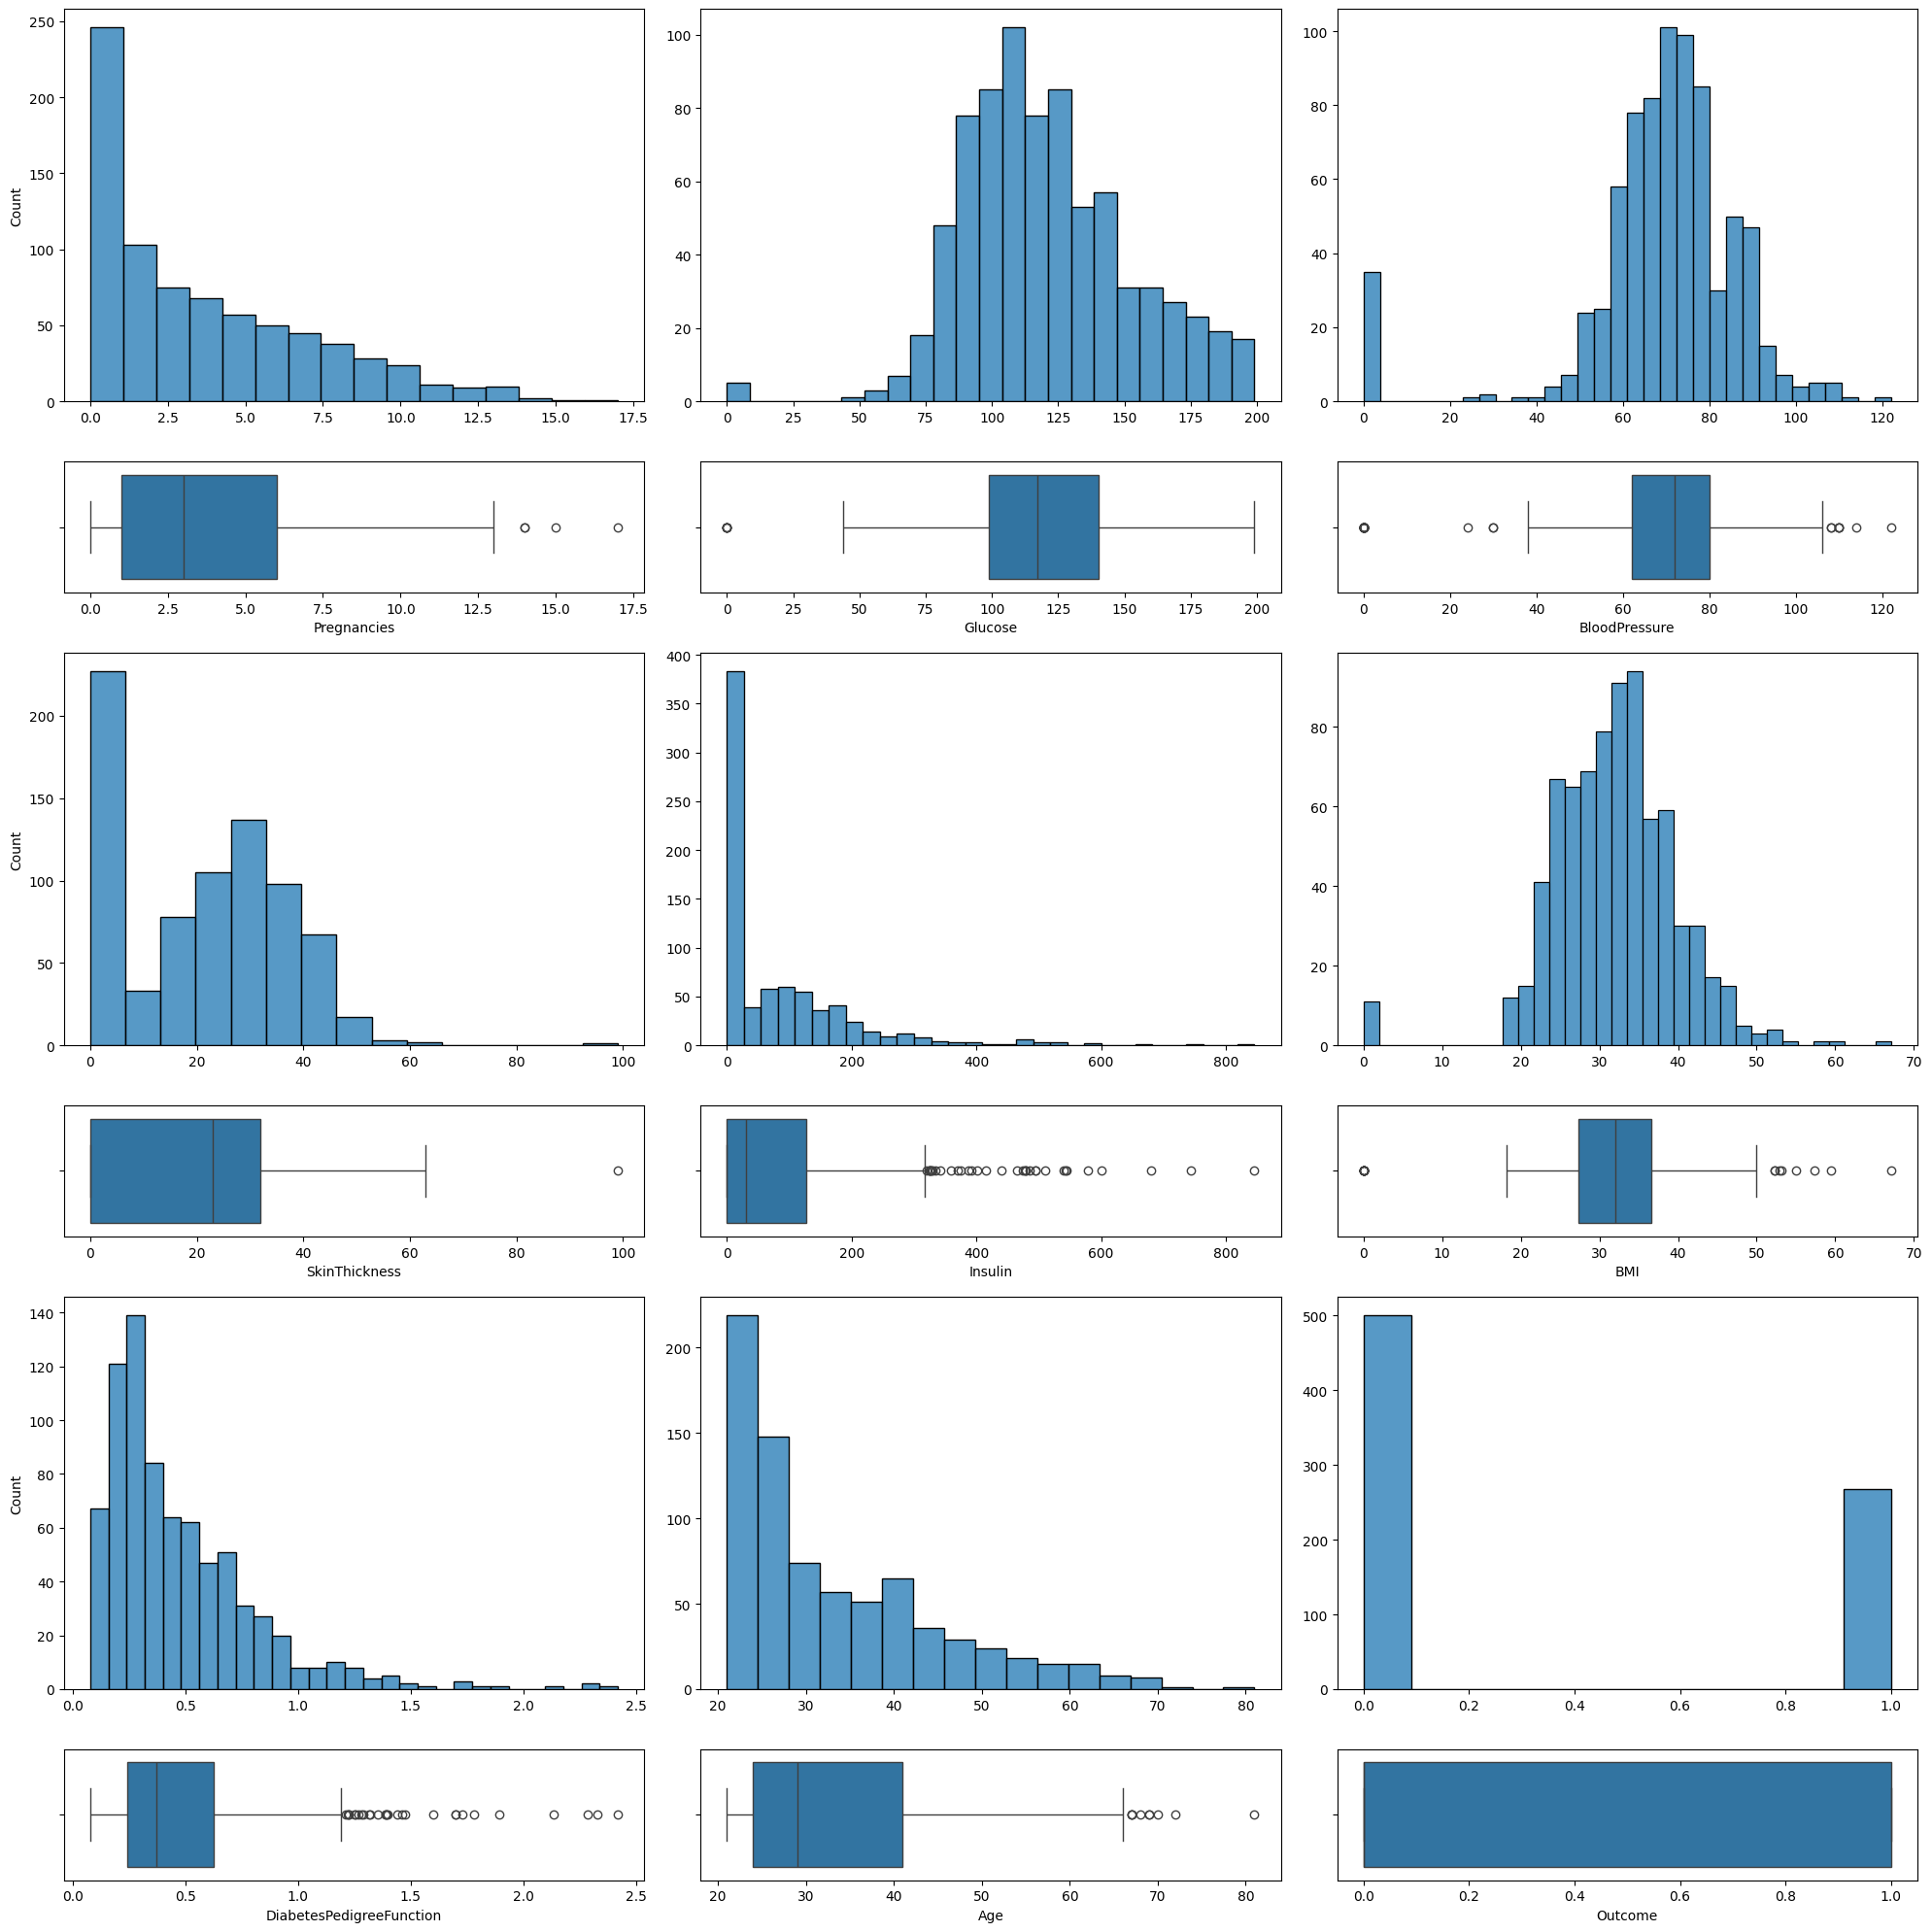

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(6, 3, figsize = (20, 20), gridspec_kw={'height_ratios': [3, 1, 3, 1, 3, 1]})

sns.histplot(ax = axis[0,0], data = dataframe, x = 'Pregnancies').set(xlabel = None)
sns.boxplot(ax = axis[1,0], data = dataframe, x = 'Pregnancies')

sns.histplot(ax = axis[0,1], data = dataframe, x = 'Glucose').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1,1], data = dataframe, x = 'Glucose')

sns.histplot(ax = axis[0,2], data = dataframe, x = 'BloodPressure').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1,2], data = dataframe, x = 'BloodPressure')

###

sns.histplot(ax = axis[2,0], data = dataframe, x = 'SkinThickness').set(xlabel = None)
sns.boxplot(ax = axis[3,0], data = dataframe, x = 'SkinThickness')

sns.histplot(ax = axis[2,1], data = dataframe, x = 'Insulin').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3,1], data = dataframe, x = 'Insulin')

sns.histplot(ax = axis[2,2], data = dataframe, x = 'BMI').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3,2], data = dataframe, x = 'BMI')

###

sns.histplot(ax = axis[4,0], data = dataframe, x = 'DiabetesPedigreeFunction').set(xlabel = None)
sns.boxplot(ax = axis[5,0], data = dataframe, x = 'DiabetesPedigreeFunction')

sns.histplot(ax = axis[4,1], data = dataframe, x = 'Age').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5,1], data = dataframe, x = 'Age')

sns.histplot(ax = axis[4,2], data = dataframe, x = 'Outcome').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5,2], data = dataframe, x = 'Outcome')

###

plt.tight_layout()

plt.show()

In [21]:
dataframe.query("BloodPressure == 0")['BloodPressure'].value_counts()

BloodPressure
0    35
Name: count, dtype: int64

In [22]:
dataframe.query("BMI == 0")['BMI'].value_counts()

BMI
0.0    11
Name: count, dtype: int64

No tiene sentido real, que el BMI y la Presión sanguínea de una persona sea cero.

- ### Análisis multivariante:

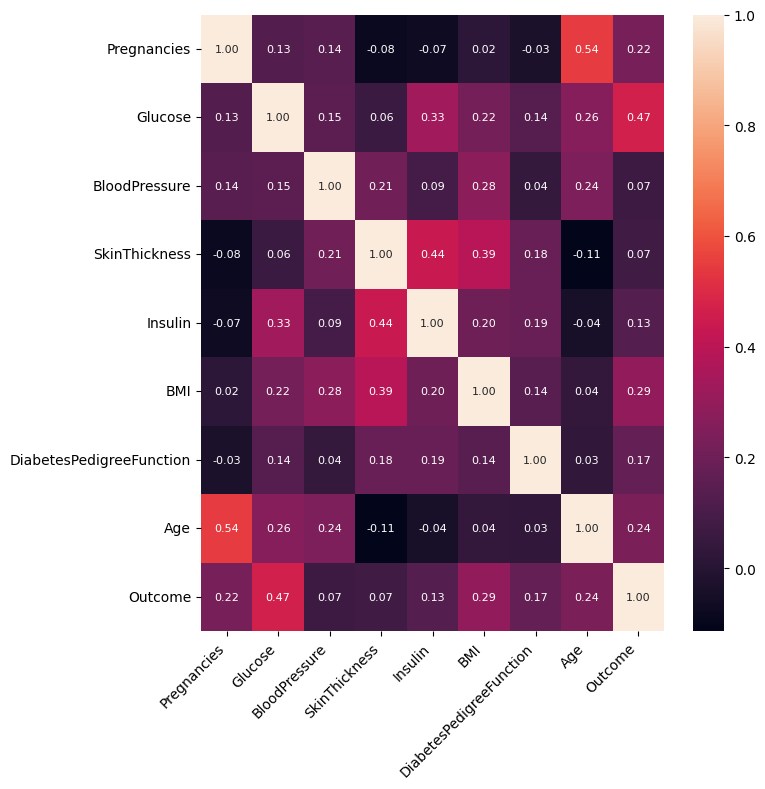

In [23]:
plt.figure(figsize = (8,8))

corr = dataframe[dataframe.columns.tolist()].corr()

sns.heatmap(corr, annot = True, fmt = ".2f", annot_kws={'size': 8})

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

- Existe correlación significativa entre el número de embarazos y la edad.
- Existe correlación significativa entre el nivel de glucosa y ser o no diabético.
- Existe correlación significativa entre el nivel de insulina y grosor del pliegue cutáneo del tríceps.
- Existe correlación significativa entre el índice de masa corporal y grosor del pliegue cutáneo del tríceps.

In [24]:
mediana_blood_pressure = dataframe['BloodPressure'].median()
mediana_bmi = dataframe['BMI'].median()

# Reemplaza los valores iguales a cero por la mediana

dataframe['BloodPressure'] = dataframe['BloodPressure'].replace(0, mediana_blood_pressure)
dataframe['BMI'] = dataframe['BMI'].replace(0, mediana_bmi)

In [25]:
#Primero se separan los conjuntos de train y test
from sklearn.model_selection import train_test_split

X = dataframe.drop(['Outcome'], axis = 1)
y = dataframe['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

- #### Entrenamiento del modelo

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

model = DecisionTreeClassifier(random_state = 42)

In [27]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
y_predict = model.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_predict)
print('Precisión')
print(round(accuracy,4))

Precisión
0.7922


In [30]:
model.get_depth()

14

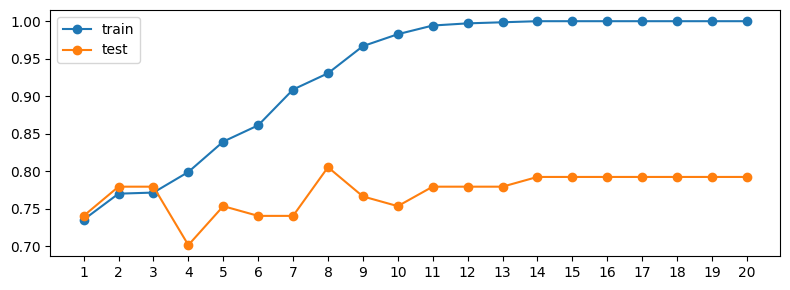

In [31]:
from sklearn.tree import DecisionTreeClassifier

max_depths = list(range(1,21))
training = []
test = []

for i in max_depths:

    model_tree = DecisionTreeClassifier(max_depth = i, random_state = 42)
    model_tree.fit(X_train, y_train)

    y_train_predict = model_tree.predict(X_train)
    y_train_predict_accuracy = accuracy_score(y_train, y_train_predict)
    training.append(y_train_predict_accuracy)

    y_test_predict = model_tree.predict(X_test)
    y_test_predict_accuracy = accuracy_score(y_test, y_test_predict)
    test.append(y_test_predict_accuracy)


plt.figure(figsize = (8,3))

plt.plot(max_depths, training, 'o-', label = 'train')
plt.plot(max_depths, test, 'o-', label = 'test')
plt.xticks(range(1, 21))
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
hyperparams = {
    'max_depth' : list(range(1, 21, 2)),
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_split' : list(range(2,20,2)),
    'min_samples_leaf' : list(range(1, 5))
}

In [33]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state = 42)
grid_search = GridSearchCV(estimator = model, param_grid = hyperparams, scoring = 'accuracy', n_jobs = -1, cv = 10)

In [34]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18]},
             scoring='accuracy')

In [35]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

In [36]:
y_predic_best = best_model.predict(X_test)

In [37]:
accuracy_score(y_test, y_predic_best)

0.7402597402597403

In [38]:
y_prueba = best_model.predict(X_train)
accuracy_score(y_train, y_prueba)

0.829232995658466

El modelo generaliza mejor.

In [39]:
from pickle import dump

dump(best_model, open("../models/best_model_tree_classifier.sav", "wb"))

In [40]:
X_train["Outcome"] = list(y_train)
X_test["Outcome"] = list(y_test)
X_train.to_csv("../data/processed/diabetes_train.csv", index=False)
X_test.to_csv("../data/processed/diabetes_test.csv", index=False)